<a href="https://colab.research.google.com/github/mam-7/CE888/blob/master/CE888_1907191_ASSIGN/STREAMBASED_MUSHROOM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd

In [3]:
path = 'gdrive/My Drive/CHECK/'

In [4]:
df=pd.read_csv(path+"mushrooms.csv")

In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
#DATA PREPROCESSING :SINCE THE VALUES ARE STRINGS WE CHANGE TO NUMBERS
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for col in df.columns:
    df[col] = labelencoder.fit_transform(df[col])
 
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1


In [7]:
X = df.iloc[:,1:23] 
y = df.iloc[:, 0]  
X.head()
y.head()

0    1
1    0
2    0
3    1
4    0
Name: class, dtype: int64

In [8]:
#SCALING FOR BETTER RESULTS IN MODEL
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scaler.fit_transform(X)
X

array([[ 1.02971224,  0.14012794, -0.19824983, ..., -0.67019486,
        -0.5143892 ,  2.03002809],
       [ 1.02971224,  0.14012794,  1.76587407, ..., -0.2504706 ,
        -1.31310821, -0.29572966],
       [-2.08704716,  0.14012794,  1.37304929, ..., -0.2504706 ,
        -1.31310821,  0.86714922],
       ...,
       [-0.8403434 ,  0.14012794, -0.19824983, ..., -1.50964337,
        -2.11182722,  0.28570978],
       [-0.21699152,  0.95327039, -0.19824983, ...,  1.42842641,
         0.28432981,  0.28570978],
       [ 1.02971224,  0.14012794, -0.19824983, ...,  0.16925365,
        -2.11182722,  0.28570978]])

In [9]:
#DIMENSION REDUCTION
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(X)

array([[-5.74321902e-01, -9.75781349e-01, -1.22176154e+00, ...,
        -2.08581362e-01,  8.13996758e-03, -1.59211948e-17],
       [-2.28210230e+00,  2.79066333e-01, -1.20049669e+00, ...,
         1.52238789e-01, -1.96446132e-01,  4.35476041e-17],
       [-1.85803562e+00, -2.70972362e-01, -1.37237069e+00, ...,
         2.57581784e-01, -3.62577199e-01,  1.93182410e-17],
       ...,
       [-1.62151632e+00, -7.57536709e-01,  2.73357994e+00, ...,
        -1.42532241e+00,  6.36990122e-01,  7.01453987e-19],
       [ 3.67060561e+00, -1.03277450e+00,  1.68459501e-01, ...,
         9.41440123e-02, -6.43462238e-02, -3.98483680e-20],
       [-1.57520272e+00, -1.22858140e+00,  2.44722789e+00, ...,
        -8.04626064e-01,  5.90315263e-01,  7.43806407e-20]])

In [10]:
!pip install modAL

In [11]:
from modAL.models import ActiveLearner
from modAL.uncertainty import uncertainty_sampling 
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns


In [12]:
from sklearn.model_selection import train_test_split


In [13]:
import numpy as np

In [14]:
from sklearn.ensemble import RandomForestClassifier
from modAL.models import ActiveLearner

# assembling initial training set
n_initial = 5
initial_idx = np.random.choice(range(len(X)), size=n_initial, replace=False)
X_train, y_train = X[initial_idx], y[initial_idx]

# initialize the learner
learner = ActiveLearner(
    estimator=RandomForestClassifier(),
    X_training=X_train, y_training=y_train
)
unqueried_score = learner.score(X, y)

print('Initial prediction accuracy: %f' % unqueried_score)


Initial prediction accuracy: 0.501723


In [15]:
from modAL.uncertainty import classifier_uncertainty

performance_history = [unqueried_score]

# learning until the accuracy reaches a given threshold
while learner.score(X, y) < 0.90:
    stream_idx = np.random.choice(range(len(X)))
    if classifier_uncertainty(learner, X[stream_idx].reshape(1, -1)) >= 0.4:
        learner.teach(X[stream_idx].reshape(1, -1), y[stream_idx].reshape(-1, ))
        new_score = learner.score(X, y)
        performance_history.append(new_score)
        print('INSTANCE no. %d queried, new accuracy: %f' % (stream_idx, new_score))


INSTANCE no. 7128 queried, new accuracy: 0.505662
INSTANCE no. 3861 queried, new accuracy: 0.614599
INSTANCE no. 5251 queried, new accuracy: 0.594042
INSTANCE no. 3184 queried, new accuracy: 0.686484
INSTANCE no. 2032 queried, new accuracy: 0.711226
INSTANCE no. 3640 queried, new accuracy: 0.728459
INSTANCE no. 4029 queried, new accuracy: 0.722181
INSTANCE no. 982 queried, new accuracy: 0.807853
INSTANCE no. 992 queried, new accuracy: 0.876416
INSTANCE no. 3365 queried, new accuracy: 0.849458
INSTANCE no. 993 queried, new accuracy: 0.868291
INSTANCE no. 6142 queried, new accuracy: 0.876046
INSTANCE no. 120 queried, new accuracy: 0.888725
INSTANCE no. 323 queried, new accuracy: 0.916420


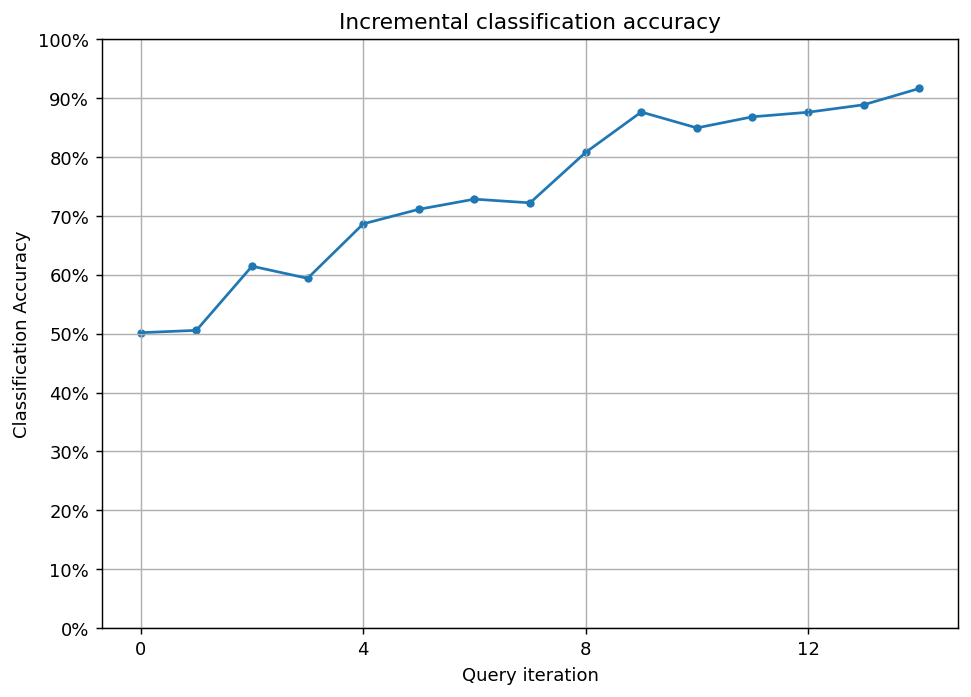

In [16]:
# Plot our performance over time.
import matplotlib as mpl
fig, ax = plt.subplots(figsize=(8.5, 6), dpi=130)

ax.plot(performance_history)
ax.scatter(range(len(performance_history)), performance_history, s=13)

ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=5, integer=True))
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=10))
ax.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(xmax=1))

ax.set_ylim(bottom=0, top=1)
ax.grid(True)

ax.set_title('Incremental classification accuracy')
ax.set_xlabel('Query iteration')
ax.set_ylabel('Classification Accuracy')

plt.show()